In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
from matplotlib.ticker import FuncFormatter

# plt.style.available
# plt.style.use('seaborn-colorblind')
# define global plot parameters
params = {'axes.labelsize' : 11, 'axes.titlesize' : 11,
          'font.size' : 11, 'legend.fontsize' : 11,
          'xtick.labelsize' : 11, 'ytick.labelsize' : 11}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
SAVEPATH = '[...PATH...]/comnetorg_plots'

In [3]:
col_com = 'blue'
col_net = 'red'
col_org = 'green'

In [90]:
def ts_plot(df, cdn_list):

    ts_fig, ts_ax = plt.subplots(figsize = (6, 2))

    for cdn in cdn_list:
        ts_ax.plot(df['date'], df[cdn], 
                   label = cdn, 
                   marker = 'o', 
                   linewidth = 0, 
                   markersize = 1,
                   markeredgewidth = 0.5)
    
    return (ts_fig, ts_ax)

def ts_mplot(df, cdn_list, marker_list):

    ts_fig, ts_ax = plt.subplots(figsize = (6, 2))

    for (cdn, marker) in list(zip(cdn_list, marker_list)):
        ts_ax.plot(df['date'], df[cdn], 
                   label = cdn, 
                   marker = marker, 
                   linewidth = 0,
                   markersize = 2,
                   markeredgewidth = 0.5,
                   fillstyle = 'none',
                   markevery=10)
    
    return (ts_fig, ts_ax)


def ts_plot_with_total(df, cdn_list, label='domains (total)'):
    ts_fig, ts_ax = ts_plot(df, cdn_list)
    
    ts_ax.plot(df['date'], df['dom_count'], 
               label = label, 
               marker = 'o', 
               linewidth = 0, 
               markersize = 1,
               markeredgewidth = 0.5,
               color = col_all)
    
    return (ts_fig, ts_ax)
    

In [91]:
def ts_format(ts_fig, ts_ax,
              xlabel='',
              ylabel='', yscale='linear', ylim=[], yticks=[], yformat='',
              legend_col=2, legend_bbox=(0, 1.35),
              filename='',
              colors=[],
              mkscale=4
             ):
    
    # PLOT FORMATTING
    ts_ax.set_xlabel(xlabel)
    ts_ax.set_ylabel(ylabel)
    ts_ax.set_yscale(yscale)
    
    if ylim:
        ts_ax.set_ylim(ylim)
    if yticks:
        ts_ax.set_yticks(yticks)

    ts_ax.grid(False)
    ts_ax.spines['right'].set_color('none')
    ts_ax.spines['top'].set_color('none')
    ts_ax.yaxis.set_ticks_position('left')
    ts_ax.xaxis.set_ticks_position('bottom')
    ts_ax.spines['bottom'].set_position(('axes', -0.02))
    ts_ax.spines['left'].set_position(('axes', -0.02))

    ts_ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
    ts_ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ts_ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n\'%y'))

    if yformat == 'percentage':
        def to_percent(y, position): return '{0:.1f}%'.format(y*100)
        ts_ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
    elif yformat == 'k':
        def to_km(y, position):
            if y > 1000000:
                return '{0:}M'.format(y/1000000)
            elif y > 1000:
                return '{0:}k'.format(y/1000)
            else:
                return y
        ts_ax.yaxis.set_major_formatter(FuncFormatter(to_km))
    
    if colors:
        for col, line in list(zip(colors, ts_ax.get_lines())):
            line.set_color(col)
    
    ts_ax.legend(loc = 'upper left', ncol = legend_col, markerscale = mkscale,
                 bbox_to_anchor=legend_bbox, fontsize = 'small')
    
    if filename:
        ts_fig.savefig('%s/%s.pdf' % (SAVEPATH, filename), bbox_inches='tight')

    return ts_fig

# .com domains

In [6]:
com = pd.read_csv('com_by_asn_processed.csv', parse_dates=['date'])
com_total = pd.read_csv('comstats.csv', parse_dates=['date'])

In [7]:
com.head()

,date,AT&T,Akamai,Amazon,Ananke,Aryaka,Azion,BitGravity,BunnyCDN,CDN77,...,Reflected Networks,SFR,StackPath,SwiftServe,Taobao,Telenor,Twitter,Yahoo,Yottaa,Zenedge
0,2015-03-01,89477,1625946,3722450,54,31,0,54,0,66,...,15451,5975,0,17,0,5094,16,606884,0,1
1,2015-03-02,89446,1625002,3704471,54,31,0,55,0,68,...,15440,5981,0,11,0,5097,16,606974,0,1
2,2015-03-03,89356,1630418,3723376,54,32,0,55,0,66,...,15388,5974,0,11,0,5103,16,606755,0,1
3,2015-03-04,89333,1634610,3729376,54,32,0,55,0,67,...,15366,5980,0,12,0,5092,16,605306,0,1
4,2015-03-05,89315,1639095,3762806,54,28,0,55,0,67,...,15367,5996,0,8,0,5091,16,605474,0,1


In [8]:
# order columns by CDN count based on first row
com.drop(labels='date', axis=1).sort_values(com.first_valid_index(), axis=1, ascending=False).head()

,Amazon,Akamai,Google,Internap,Cloudflare,Yahoo,Rackspace,LeaseWeb CDN,Edgecast,Microsoft,...,Taobao,Yottaa,ChinaCache,StackPath,OnApp,Azion,BunnyCDN,Instartlogic,Cedexis,Medianova
0,3722450,1625946,1157955,819552,608060,606884,596135,298811,298001,140597,...,0,0,0,0,0,0,0,0,0,0
1,3704471,1625002,1158762,819334,609106,606974,595869,299453,297719,140639,...,0,0,0,0,0,0,0,0,0,0
2,3723376,1630418,1160029,818050,611116,606755,595588,292887,296365,140812,...,0,0,0,0,0,0,0,0,0,0
3,3729376,1634610,1160668,818611,612829,605306,594640,290812,296346,140963,...,0,0,0,0,0,0,0,0,0,0
4,3762806,1639095,1161417,818420,611076,605474,643263,291710,296651,141166,...,0,0,0,0,0,0,0,0,0,0


In [9]:
com.drop(labels='date', axis=1).sort_values(com.first_valid_index(), axis=1, ascending=False).columns.tolist()

['Amazon',
 'Akamai',
 'Google',
 'Internap',
 'Cloudflare',
 'Yahoo',
 'Rackspace',
 'LeaseWeb CDN',
 'Edgecast',
 'Microsoft',
 'AT&T',
 'Level3',
 'Incapsula',
 'Fastly',
 'Reflected Networks',
 'SFR',
 'Telenor',
 'Highwinds',
 'CDNetworks',
 'Limelight',
 'Facebook',
 'CacheFly',
 'CDN77',
 'BitGravity',
 'Ananke',
 'Aryaka',
 'ChinaNetCenter',
 'SwiftServe',
 'Twitter',
 'CDNvideo',
 'NGENIX',
 'Zenedge',
 'Taobao',
 'Yottaa',
 'ChinaCache',
 'StackPath',
 'OnApp',
 'Azion',
 'BunnyCDN',
 'Instartlogic',
 'Cedexis',
 'Medianova']

In [10]:
# order columns by CDN count based on last row
com.drop(labels='date', axis=1).sort_values(com.last_valid_index(), axis=1, ascending=False).tail()

,Amazon,Cloudflare,Google,LeaseWeb CDN,Microsoft,Yahoo,Rackspace,Fastly,Akamai,Incapsula,...,Aryaka,Ananke,NGENIX,CDNvideo,OnApp,SwiftServe,BunnyCDN,Instartlogic,ChinaNetCenter,Cedexis
1791,9655546,4914248,4241401,1184363,436205,418061,315689,293177,214926,94922,...,8,3,2,1,0,0,0,0,0,0
1792,9645289,4905191,4976838,1194498,433215,417753,314763,292944,214789,94742,...,9,3,2,1,0,0,0,0,0,0
1793,9648189,4911899,7190160,1203694,432284,417442,315608,293279,214829,94808,...,9,3,2,1,0,0,0,0,0,0
1794,9646842,4918759,4557012,1201595,431959,417276,315664,293675,214845,94470,...,8,3,2,1,0,0,0,0,0,0
1795,9646649,4919489,4537322,1187760,432725,416787,315450,293785,214875,93795,...,8,3,2,1,0,0,0,0,0,0


In [11]:
com.drop(labels='date', axis=1).sort_values(com.last_valid_index(), axis=1, ascending=False).columns.tolist()

['Amazon',
 'Cloudflare',
 'Google',
 'LeaseWeb CDN',
 'Microsoft',
 'Yahoo',
 'Rackspace',
 'Fastly',
 'Akamai',
 'Incapsula',
 'Level3',
 'AT&T',
 'Zenedge',
 'Internap',
 'Edgecast',
 'Facebook',
 'Highwinds',
 'Taobao',
 'Reflected Networks',
 'SFR',
 'StackPath',
 'CDN77',
 'Telenor',
 'CDNetworks',
 'Twitter',
 'Limelight',
 'BitGravity',
 'Yottaa',
 'ChinaCache',
 'Azion',
 'CacheFly',
 'Medianova',
 'Aryaka',
 'Ananke',
 'NGENIX',
 'CDNvideo',
 'OnApp',
 'SwiftServe',
 'BunnyCDN',
 'Instartlogic',
 'ChinaNetCenter',
 'Cedexis']

In [12]:
# add total number of domains to dataframe for relative representation
com = com.merge(com_total, on='date')

In [13]:
com

,date,AT&T,Akamai,Amazon,Ananke,Aryaka,Azion,BitGravity,BunnyCDN,CDN77,...,SFR,StackPath,SwiftServe,Taobao,Telenor,Twitter,Yahoo,Yottaa,Zenedge,dom_count
0,2015-03-01,89477,1625946,3722450,54,31,0,54,0,66,...,5975,0,17,0,5094,16,606884,0,1,116287078
1,2015-03-02,89446,1625002,3704471,54,31,0,55,0,68,...,5981,0,11,0,5097,16,606974,0,1,116286708
2,2015-03-03,89356,1630418,3723376,54,32,0,55,0,66,...,5974,0,11,0,5103,16,606755,0,1,116320327
3,2015-03-04,89333,1634610,3729376,54,32,0,55,0,67,...,5980,0,12,0,5092,16,605306,0,1,116359415
4,2015-03-05,89315,1639095,3762806,54,28,0,55,0,67,...,5996,0,8,0,5091,16,605474,0,1,116415142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,2020-01-25,62651,214926,9655546,3,8,21,116,0,2820,...,3031,3124,0,10602,2853,890,418061,36,62525,143798117
1792,2020-01-26,62548,214789,9645289,3,9,21,114,0,2838,...,3059,3128,0,10609,2861,871,417753,36,55019,143800777
1793,2020-01-27,62721,214829,9648189,3,9,21,115,0,2850,...,3058,3126,0,10686,2863,888,417442,35,62430,143787278
1794,2020-01-28,62598,214845,9646842,3,8,21,115,0,2880,...,3060,3125,0,10639,2867,863,417276,26,62417,143791140


# .net domains

In [14]:
net = pd.read_csv('net_by_asn_processed.csv', parse_dates=['date'])
net_total = pd.read_csv('netstats.csv', parse_dates=['date'])

In [15]:
net.head()

,date,AT&T,Akamai,Amazon,Ananke,Aryaka,Azion,BitGravity,BunnyCDN,CDN77,...,Reflected Networks,SFR,StackPath,SwiftServe,Taobao,Telenor,Twitter,Yahoo,Yottaa,Zenedge
0,2015-03-01,14310,190390,177108,17,1,0,7,0,26,...,1500,960,0,1,0,1509,0,59948,0,0
1,2015-03-02,14324,190466,177314,17,1,0,7,0,26,...,1499,958,0,2,0,1504,0,59663,0,0
2,2015-03-03,14327,191534,177941,17,1,0,7,0,26,...,1487,961,0,1,0,1503,0,59887,0,0
3,2015-03-04,14338,192419,178099,17,1,0,7,0,26,...,1487,957,0,1,0,1502,0,59902,0,0
4,2015-03-05,14318,193071,177682,17,1,0,7,0,26,...,1487,954,0,1,0,1501,0,59835,0,0


In [16]:
# order columns by CDN count based on first row
net.drop(labels='date', axis=1).sort_values(net.first_valid_index(), axis=1, ascending=False).head()

,Akamai,Amazon,Google,Internap,Cloudflare,Rackspace,Yahoo,Edgecast,LeaseWeb CDN,Microsoft,...,Yottaa,ChinaCache,Medianova,OnApp,Azion,BunnyCDN,Instartlogic,CDNvideo,Cedexis,Zenedge
0,190390,177108,124313,114782,71363,63712,59948,37147,36201,21502,...,0,0,0,0,0,0,0,0,0,0
1,190466,177314,124414,114757,71542,63649,59663,37124,36332,21506,...,0,0,0,0,0,0,0,0,0,0
2,191534,177941,124480,114233,71670,63408,59887,37111,36012,21506,...,0,0,0,0,0,0,0,0,0,0
3,192419,178099,124528,114329,71774,62060,59902,37109,35979,21528,...,0,0,0,0,0,0,0,0,0,0
4,193071,177682,124583,114316,71173,64010,59835,37102,35912,21554,...,0,0,0,0,0,0,0,0,0,0


In [17]:
net.drop(labels='date', axis=1).sort_values(net.first_valid_index(), axis=1, ascending=False).columns.tolist()

['Akamai',
 'Amazon',
 'Google',
 'Internap',
 'Cloudflare',
 'Rackspace',
 'Yahoo',
 'Edgecast',
 'LeaseWeb CDN',
 'Microsoft',
 'AT&T',
 'Level3',
 'Incapsula',
 'Fastly',
 'Telenor',
 'Reflected Networks',
 'SFR',
 'Highwinds',
 'CDNetworks',
 'Limelight',
 'CDN77',
 'Ananke',
 'Facebook',
 'ChinaNetCenter',
 'BitGravity',
 'CacheFly',
 'NGENIX',
 'SwiftServe',
 'Aryaka',
 'Twitter',
 'StackPath',
 'Taobao',
 'Yottaa',
 'ChinaCache',
 'Medianova',
 'OnApp',
 'Azion',
 'BunnyCDN',
 'Instartlogic',
 'CDNvideo',
 'Cedexis',
 'Zenedge']

In [18]:
# order columns by CDN count based on last row
net.drop(labels='date', axis=1).sort_values(net.last_valid_index(), axis=1, ascending=False).tail()

,Amazon,Google,Cloudflare,LeaseWeb CDN,Yahoo,Microsoft,Rackspace,Akamai,Fastly,Level3,...,Aryaka,OnApp,Azion,SwiftServe,BunnyCDN,Instartlogic,CDNvideo,ChinaNetCenter,Yottaa,Cedexis
1791,355793,313927,270491,59539,39199,34753,29250,26529,17224,11023,...,0,0,0,0,0,0,0,0,0,0
1792,355329,326772,270009,60141,39180,34762,29237,26515,17231,11017,...,0,0,0,0,0,0,0,0,0,0
1793,355704,475852,270450,62454,39150,34772,29268,26521,17252,11028,...,0,0,0,0,0,0,0,0,0,0
1794,355063,327731,270537,61704,39129,34775,29288,26501,17251,11021,...,0,0,0,0,0,0,0,0,0,0
1795,352980,330328,270603,60467,39008,34793,29296,26500,17264,11029,...,0,0,0,0,0,0,0,0,0,0


In [19]:
net.drop(labels='date', axis=1).sort_values(net.last_valid_index(), axis=1, ascending=False).columns.tolist()

['Amazon',
 'Google',
 'Cloudflare',
 'LeaseWeb CDN',
 'Yahoo',
 'Microsoft',
 'Rackspace',
 'Akamai',
 'Fastly',
 'Level3',
 'AT&T',
 'Zenedge',
 'Incapsula',
 'Internap',
 'Edgecast',
 'Reflected Networks',
 'Telenor',
 'Highwinds',
 'SFR',
 'Facebook',
 'Taobao',
 'CDN77',
 'CDNetworks',
 'StackPath',
 'Limelight',
 'Twitter',
 'BitGravity',
 'ChinaCache',
 'CacheFly',
 'Ananke',
 'NGENIX',
 'Medianova',
 'Aryaka',
 'OnApp',
 'Azion',
 'SwiftServe',
 'BunnyCDN',
 'Instartlogic',
 'CDNvideo',
 'ChinaNetCenter',
 'Yottaa',
 'Cedexis']

In [20]:
# # add total number of domains to dataframe for relative representation
net = net.merge(net_total, on='date')

# .org domains

In [21]:
org = pd.read_csv('org_by_asn_processed.csv', parse_dates=['date'])
org_total = pd.read_csv('orgstats.csv', parse_dates=['date'])

In [22]:
# order columns by CDN count based on first row
org.drop(labels='date', axis=1).sort_values(org.first_valid_index(), axis=1, ascending=False).head()

,Amazon,Akamai,Google,Cloudflare,Rackspace,Yahoo,Internap,LeaseWeb CDN,Microsoft,AT&T,...,Azion,Aryaka,OnApp,ChinaCache,Medianova,BunnyCDN,Instartlogic,CDNvideo,Cedexis,Zenedge
0,139265,130091,101158,56003,53648,46172,43656,19923,13674,11717,...,0,0,0,0,0,0,0,0,0,0
1,139505,129940,101156,56090,53717,46143,43643,19887,13672,11706,...,0,0,0,0,0,0,0,0,0,0
2,140360,130204,101232,56392,53715,46122,43620,19747,13686,11718,...,0,0,0,0,0,0,0,0,0,0
3,140646,130890,101274,56583,53729,46120,43605,19746,13702,11701,...,0,0,0,0,0,0,0,0,0,0
4,140286,131218,101067,56650,53664,46047,43524,19687,13696,11686,...,0,0,0,0,0,0,0,0,0,1


In [23]:
org.drop(labels='date', axis=1).sort_values(org.first_valid_index(), axis=1, ascending=False).columns.tolist()

['Amazon',
 'Akamai',
 'Google',
 'Cloudflare',
 'Rackspace',
 'Yahoo',
 'Internap',
 'LeaseWeb CDN',
 'Microsoft',
 'AT&T',
 'Level3',
 'Edgecast',
 'Fastly',
 'Incapsula',
 'Telenor',
 'SFR',
 'Reflected Networks',
 'Highwinds',
 'Limelight',
 'CDNetworks',
 'Facebook',
 'Ananke',
 'ChinaNetCenter',
 'CacheFly',
 'CDN77',
 'BitGravity',
 'Twitter',
 'NGENIX',
 'Yottaa',
 'Taobao',
 'SwiftServe',
 'StackPath',
 'Azion',
 'Aryaka',
 'OnApp',
 'ChinaCache',
 'Medianova',
 'BunnyCDN',
 'Instartlogic',
 'CDNvideo',
 'Cedexis',
 'Zenedge']

In [24]:
# order columns by CDN count based on last row
org.drop(labels='date', axis=1).sort_values(org.last_valid_index(), axis=1, ascending=False).tail()

,Google,Amazon,Cloudflare,LeaseWeb CDN,Microsoft,Yahoo,Fastly,Akamai,Rackspace,Level3,...,SwiftServe,Cedexis,Aryaka,OnApp,Azion,BunnyCDN,Instartlogic,CDNvideo,ChinaNetCenter,Medianova
1791,348249,293458,222998,35197,29101,27784,24471,21926,21862,9867,...,0,0,0,0,0,0,0,0,0,0
1792,347792,293327,222351,35575,29017,27763,24439,21921,21818,9870,...,0,0,0,0,0,0,0,0,0,0
1793,591714,293855,223002,36541,29107,27756,24476,21936,21860,9866,...,0,0,0,0,0,0,0,0,0,0
1794,381029,294251,223206,35817,29102,27742,24504,21924,21876,9866,...,0,0,0,0,0,0,0,0,0,0
1795,349097,295215,223331,35349,29120,27725,24510,21914,21885,9876,...,0,0,0,0,0,0,0,0,0,0


In [25]:
org.drop(labels='date', axis=1).sort_values(org.last_valid_index(), axis=1, ascending=False).columns.tolist()

['Google',
 'Amazon',
 'Cloudflare',
 'LeaseWeb CDN',
 'Microsoft',
 'Yahoo',
 'Fastly',
 'Akamai',
 'Rackspace',
 'Level3',
 'AT&T',
 'Incapsula',
 'Internap',
 'Edgecast',
 'Highwinds',
 'Telenor',
 'Zenedge',
 'SFR',
 'CDN77',
 'Facebook',
 'Reflected Networks',
 'StackPath',
 'Taobao',
 'CDNetworks',
 'Limelight',
 'ChinaCache',
 'Twitter',
 'CacheFly',
 'BitGravity',
 'Yottaa',
 'NGENIX',
 'Ananke',
 'SwiftServe',
 'Cedexis',
 'Aryaka',
 'OnApp',
 'Azion',
 'BunnyCDN',
 'Instartlogic',
 'CDNvideo',
 'ChinaNetCenter',
 'Medianova']

In [26]:
# # add total number of domains to dataframe for relative representation
org = org.merge(org_total, on='date')

# =====================================================

In [40]:
com_agg

,date,AT&T,Akamai,Amazon,Ananke,Aryaka,Azion,BitGravity,BunnyCDN,CDN77,...,SFR,StackPath,SwiftServe,Taobao,Telenor,Twitter,Yahoo,Yottaa,Zenedge,domains_total
0,2015-03-01,89477,1625946,3722450,54,31,0,54,0,66,...,5975,0,17,0,5094,16,606884,0,1,116287078
1,2015-03-02,89446,1625002,3704471,54,31,0,55,0,68,...,5981,0,11,0,5097,16,606974,0,1,116286708
2,2015-03-03,89356,1630418,3723376,54,32,0,55,0,66,...,5974,0,11,0,5103,16,606755,0,1,116320327
3,2015-03-04,89333,1634610,3729376,54,32,0,55,0,67,...,5980,0,12,0,5092,16,605306,0,1,116359415
4,2015-03-05,89315,1639095,3762806,54,28,0,55,0,67,...,5996,0,8,0,5091,16,605474,0,1,116415142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,2020-01-25,62651,214926,9655546,3,8,21,116,0,2820,...,3031,3124,0,10602,2853,890,418061,36,62525,143798117
1792,2020-01-26,62548,214789,9645289,3,9,21,114,0,2838,...,3059,3128,0,10609,2861,871,417753,36,55019,143800777
1793,2020-01-27,62721,214829,9648189,3,9,21,115,0,2850,...,3058,3126,0,10686,2863,888,417442,35,62430,143787278
1794,2020-01-28,62598,214845,9646842,3,8,21,115,0,2880,...,3060,3125,0,10639,2867,863,417276,26,62417,143791140


In [45]:
com_agg = com.copy()
com_agg.rename(columns={'dom_count' : 'domains_total'}, inplace=True)
com_agg = com_agg.set_index('date')
com_agg['domains_cdn'] = com_agg[[col for col in com_agg.columns if "_total" not in col]].sum(axis=1)
com_agg = com_agg.reset_index()[['date', 'domains_cdn', 'domains_total']]

net_agg = net.copy()
net_agg.rename(columns={'dom_count' : 'domains_total'}, inplace=True)
net_agg = net_agg.set_index('date')
net_agg['domains_cdn'] = net_agg[[col for col in net_agg.columns if "_total" not in col]].sum(axis=1)
net_agg = net_agg.reset_index()[['date', 'domains_cdn', 'domains_total']]

org_agg = org.copy()
org_agg.rename(columns={'dom_count' : 'domains_total'}, inplace=True)
org_agg = org_agg.set_index('date')
org_agg['domains_cdn'] = org_agg[[col for col in org_agg.columns if "_total" not in col]].sum(axis=1)
org_agg = org_agg.reset_index()[['date', 'domains_cdn', 'domains_total']]

In [46]:
com_agg.head()

,date,domains_cdn,domains_total
0,2015-03-01,10094330,116287078
1,2015-03-02,10077326,116286708
2,2015-03-03,10095026,116320327
3,2015-03-04,10105438,116359415
4,2015-03-05,11286898,116415142


In [47]:
net_agg.head()

,date,domains_cdn,domains_total
0,2015-03-01,927190,15010133
1,2015-03-02,927517,15007917
2,2015-03-03,928505,15009256
3,2015-03-04,928455,15010612
4,2015-03-05,989550,15011537


In [48]:
org_agg.head()

,date,domains_cdn,domains_total
0,2015-03-01,634256,10517106
1,2015-03-02,634409,10515906
2,2015-03-03,635757,10517942
3,2015-03-04,636934,10519427
4,2015-03-05,704515,10520052


In [49]:
overall = pd.merge(com_agg, net_agg, on=['date'], suffixes=('_com', '_net'))

In [50]:
overall = overall.merge(org_agg, on=['date']
                       ).rename(columns={'domains_cdn' : 'domains_cdn_org',
                                         'domains_total' : 'domains_total_org'
                                        }
                               )

In [51]:
overall['cno_cdn'] = overall['domains_cdn_com'] + overall['domains_cdn_net'] + overall['domains_cdn_org']
overall['cno_total'] = overall['domains_total_com'] + overall['domains_total_net'] + overall['domains_total_org']

In [52]:
overall['.com'] = overall['domains_cdn_com'] / overall['domains_total_com']
overall['.net'] = overall['domains_cdn_net'] / overall['domains_total_net']
overall['.org'] = overall['domains_cdn_org'] / overall['domains_total_org']
overall['Total'] = overall['cno_cdn'] / overall['cno_total']

In [53]:
overall.rename(columns = {'domains_cdn_com' : '.com (CDI)',
                          'domains_total_com' : '.com (total)',
                          'domains_cdn_net' : '.net (CDI)',
                          'domains_total_net' : '.net (total)',
                          'domains_cdn_org' : '.org (CDI)',
                          'domains_total_org' : '.org (total)'},
               inplace=True
              )

In [54]:
overall.head()

,date,.com (CDI),.com (total),.net (CDI),.net (total),.org (CDI),.org (total),cno_cdn,cno_total,.com,.net,.org,Total
0,2015-03-01,10094330,116287078,927190,15010133,634256,10517106,11655776,141814317,0.086805,0.061771,0.060307,0.082190
1,2015-03-02,10077326,116286708,927517,15007917,634409,10515906,11639252,141810531,0.086659,0.061802,0.060329,0.082076
2,2015-03-03,10095026,116320327,928505,15009256,635757,10517942,11659288,141847525,0.086786,0.061862,0.060445,0.082196
3,2015-03-04,10105438,116359415,928455,15010612,636934,10519427,11670827,141889454,0.086847,0.061853,0.060548,0.082253
4,2015-03-05,11286898,116415142,989550,15011537,704515,10520052,12980963,141946731,0.096954,0.065919,0.066969,0.091450


In [92]:
%%capture
ts_fig, ts_ax = ts_mplot(overall, ['.com', '.net', '.org'], ['d', '^', 'o'])

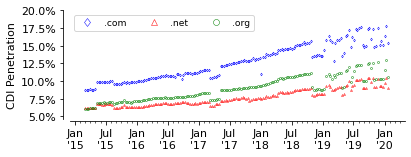

In [93]:
ts_format(ts_fig, ts_ax, ylabel='CDI Penetration',
          legend_col=3, legend_bbox=(0,1), yformat='percentage', yticks=[0.05,0.075,0.1,0.125,0.15,0.175,0.2],
          filename='cno_pen', colors=[col_com, col_net, col_org], mkscale=3),

In [57]:
overall.head()

,date,.com (CDI),.com (total),.net (CDI),.net (total),.org (CDI),.org (total),cno_cdn,cno_total,.com,.net,.org,Total
0,2015-03-01,10094330,116287078,927190,15010133,634256,10517106,11655776,141814317,0.086805,0.061771,0.060307,0.082190
1,2015-03-02,10077326,116286708,927517,15007917,634409,10515906,11639252,141810531,0.086659,0.061802,0.060329,0.082076
2,2015-03-03,10095026,116320327,928505,15009256,635757,10517942,11659288,141847525,0.086786,0.061862,0.060445,0.082196
3,2015-03-04,10105438,116359415,928455,15010612,636934,10519427,11670827,141889454,0.086847,0.061853,0.060548,0.082253
4,2015-03-05,11286898,116415142,989550,15011537,704515,10520052,12980963,141946731,0.096954,0.065919,0.066969,0.091450


In [58]:
overall.tail()

,date,.com (CDI),.com (total),.net (CDI),.net (total),.org (CDI),.org (total),cno_cdn,cno_total,.com,.net,.org,Total
1784,2020-01-25,22081333,143798117,1191105,13172947,1060295,9994791,24332733,166965855,0.153558,0.090421,0.106085,0.145735
1785,2020-01-26,22794765,143800777,1202800,13171691,1059178,9994020,25056743,166966488,0.158516,0.091317,0.105981,0.150070
1786,2020-01-27,25035244,143787278,1355995,13172911,1305482,9993400,27696721,166953589,0.174113,0.102938,0.130634,0.165895
1787,2020-01-28,22404995,143791140,1206491,13172305,1094690,9994639,24706176,166958084,0.155816,0.091593,0.109528,0.147978
1788,2020-01-29,22371373,143815203,1205757,13170402,1063289,9995737,24640419,166981342,0.155556,0.091551,0.106374,0.147564


In [59]:
overall.tail().reset_index() - overall.head().reset_index()

,index,date,.com (CDI),.com (total),.net (CDI),.net (total),.org (CDI),.org (total),cno_cdn,cno_total,.com,.net,.org,Total
0,1784,1791 days,11987003,27511039,263915,-1837186,426039,-522315,12676957,25151538,0.066753,0.028650,0.045778,0.063544
1,1784,1791 days,12717439,27514069,275283,-1836226,424769,-521886,13417491,25155957,0.071857,0.029515,0.045653,0.067994
2,1784,1791 days,14940218,27466951,427490,-1836345,669725,-524542,16037433,25106064,0.087327,0.041076,0.070189,0.083699
3,1784,1791 days,12299557,27431725,278036,-1838307,457756,-524788,13035349,25068630,0.068969,0.029740,0.048979,0.065725
4,1784,1791 days,11084475,27400061,216207,-1841135,358774,-524315,11659456,25034611,0.058603,0.025631,0.039405,0.056114


In [60]:
overall.describe()

,.com (CDI),.com (total),.net (CDI),.net (total),.org (CDI),.org (total),cno_cdn,cno_total,.com,.net,.org,Total
count,1.789000e+03,1.789000e+03,1.789000e+03,1.789000e+03,1.789000e+03,1.789000e+03,1.789000e+03,1.789000e+03,1789.000000,1789.000000,1789.000000,1789.000000
mean,1.659690e+07,1.300461e+08,1.103457e+06,1.454336e+07,9.238230e+05,1.043093e+07,1.862417e+07,1.550203e+08,0.126299,0.076469,0.088905,0.119225
std,4.110435e+06,7.576776e+06,1.103614e+05,8.273987e+05,1.537489e+05,2.706290e+05,4.364435e+06,6.703576e+06,0.024361,0.011626,0.016631,0.023199
min,1.007328e+07,1.162867e+08,8.204080e+05,1.315126e+07,6.342560e+05,9.985212e+06,1.163286e+07,1.418105e+08,0.086188,0.052473,0.060307,0.081822
25%,1.321930e+07,1.259852e+08,1.026728e+06,1.381519e+07,8.197110e+05,1.030692e+07,1.503480e+07,1.521119e+08,0.104613,0.066885,0.075105,0.098596
50%,1.614744e+07,1.283176e+08,1.082410e+06,1.480250e+07,9.056770e+05,1.037436e+07,1.818211e+07,1.539130e+08,0.125963,0.074023,0.087917,0.118607
75%,1.995830e+07,1.364820e+08,1.186913e+06,1.505491e+07,1.045015e+06,1.056967e+07,2.222727e+07,1.605861e+08,0.147380,0.086137,0.103357,0.139116
max,2.577019e+07,1.438152e+08,1.394054e+06,1.581947e+07,1.305482e+06,1.091833e+07,2.844000e+07,1.669813e+08,0.179226,0.105454,0.130634,0.170346


In [61]:
com.iloc[1300:1600]

,date,AT&T,Akamai,Amazon,Ananke,Aryaka,Azion,BitGravity,BunnyCDN,CDN77,...,SFR,StackPath,SwiftServe,Taobao,Telenor,Twitter,Yahoo,Yottaa,Zenedge,dom_count
1300,2018-09-21,64690,1713706,11823615,4,24,0,101,0,554,...,4793,3300,0,9,3307,404,514842,29,74137,135793458
1301,2018-09-22,64587,1712630,11940157,4,24,0,101,0,536,...,4776,3297,0,7,3309,375,514629,29,74105,135807547
1302,2018-09-23,64694,1717454,11958103,4,24,0,102,0,542,...,4789,3297,0,8,3312,382,514442,29,74067,135799757
1303,2018-09-24,64768,1720765,11951186,4,24,0,101,0,546,...,4798,3297,0,6,3310,370,514268,29,74037,135793484
1304,2018-09-25,64655,1727780,11953722,4,24,0,103,0,556,...,4803,3292,0,5,3311,418,514254,30,74053,135828196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2019-07-13,62168,211704,9358023,0,9,0,109,0,2297,...,3312,3339,0,1687,3051,367,457220,21,68251,140840488
1596,2019-07-14,62049,211491,9361660,0,9,0,109,0,2261,...,3307,3339,0,625,3052,412,457020,21,68198,140824482
1597,2019-07-15,62121,211472,9357637,0,9,0,110,0,2294,...,3308,3341,0,501,3053,387,456807,21,68152,140811303
1598,2019-07-16,62035,211119,9366957,0,9,0,111,0,2339,...,3314,3345,0,494,3051,374,456731,22,68145,140829877
